In [594]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats 
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)
sns.set(style="darkgrid", font_scale=1.2)

from cmath import nan

In [595]:
#chapter-10

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [596]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0.0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
#dfLE=dfLE[~np.isnan(dfLE)]
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


In [597]:
#sns.histplot(dfLE)

<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [598]:
# add a column for GDP per Capita
dfLE['GDP_per_Capita'] = (dfLE['GDP'] / dfLE['Population'])

In [599]:
#dfLE=dfLE[~np.isnan(dfLE)]

In [600]:
# Print 10 random rows of GDP per Capita
dfLE['GDP_per_Capita'].head(10)

0    0.000034
1    0.003042
2    0.000132
3    0.000195
4         NaN
5    0.000348
6    0.001970
7    0.007551
8    0.005224
9    0.001531
Name: GDP_per_Capita, dtype: float64

In [601]:
#removing NAN's from the GDP per Capita Data
df_p=dfLE["GDP_per_Capita"]
df_p=df_p[~np.isnan(df_p)]
df_p.head()


0    0.000034
1    0.003042
2    0.000132
3    0.000195
5    0.000348
Name: GDP_per_Capita, dtype: float64

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

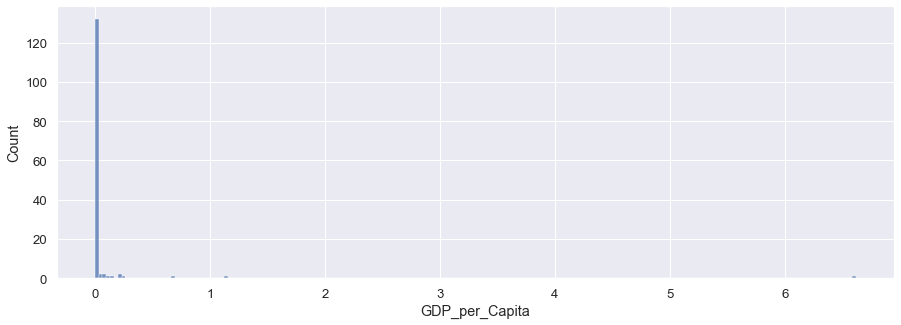

In [602]:
#Plottng histogram for GDP per Capita Data
sns.histplot(df_p, bins=200)

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [603]:
#Graph
#hist2 = thinkstats2.Hist(round(dfEL))
hist2 = thinkstats2.Hist(df_p)
pmf2 = thinkstats2.Pmf(df_p)
cdf2 = thinkstats2.Cdf(df_p)

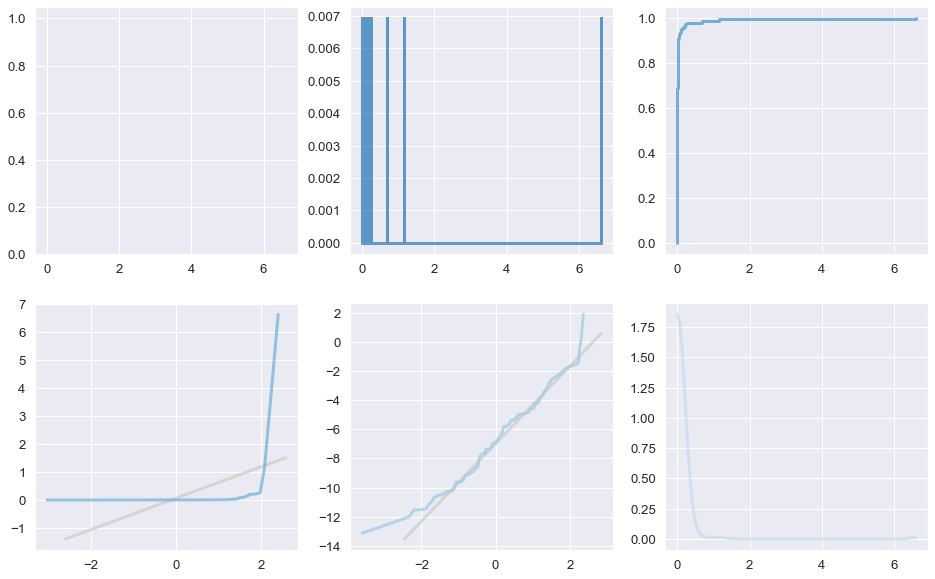

In [604]:
#Print all distributions
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df_p)
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df_p))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df_p) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [605]:
#Analytical for Schooling
dfs=dfLE["Schooling"]
dfs=dfs[~np.isnan(dfs)]

In [606]:
dfs.info()

<class 'pandas.core.series.Series'>
Int64Index: 178 entries, 0 to 190
Series name: Schooling
Non-Null Count  Dtype  
--------------  -----  
178 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


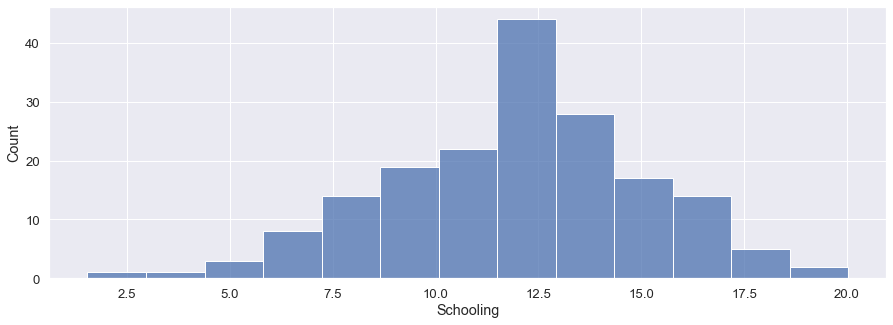

In [607]:
#Empirical distribution
sns.histplot(dfs)
sns.set(style="darkgrid", font_scale=1.2)

c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


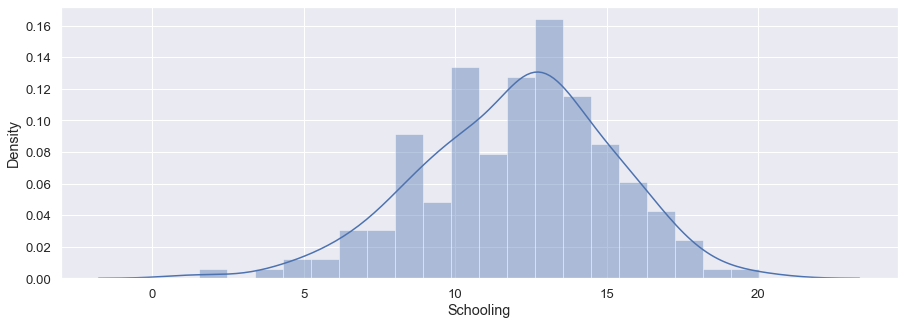

In [608]:
#Empirical distribution

sns.distplot(dfs,bins=20)
sns.set(style="darkgrid", font_scale=1.2)

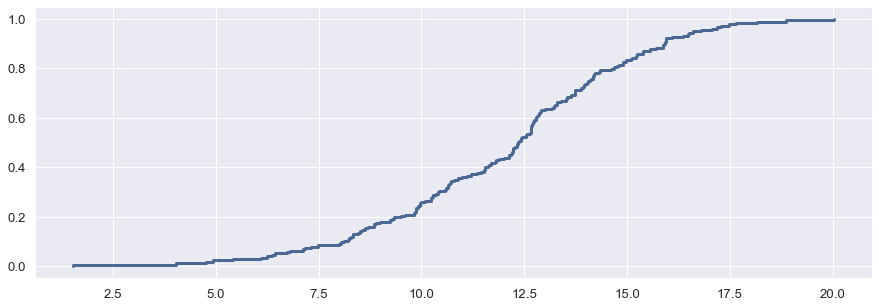

In [609]:
#Make an emperical CDF
cdf_es = thinkstats2.Cdf(dfs)
thinkplot.Cdf(cdf_es)
sns.set(style="darkgrid", font_scale=1.2)

In [610]:
# Empirical distribution provides a near bell shape curve, therefore possibility that its a normal distribution

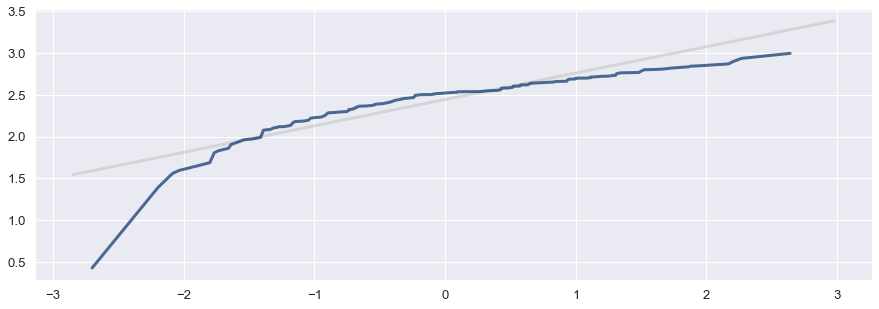

In [611]:
# Analytical distribution
# Normal Probability plot

thinkstats2.NormalProbabilityPlot(np.log(dfs))

In [612]:
dfs

0       8.21250
1      12.13750
2      12.71250
3       8.04375
4       8.84375
         ...   
186    12.78750
187    11.51250
188     8.50625
189    11.21250
190     9.82500
Name: Schooling, Length: 178, dtype: float64

In [613]:
from scipy.stats import expon
import matplotlib.pyplot as plt

In [614]:
#Make analytical dist.
mu1 = dfs.mean()
sigma1 = dfs.std()
mu1, sigma1

(12.027738764044944, 3.104851565570136)

In [615]:
#Make an analytical distribution
dfs_a = scipy.stats.norm(mu1,sigma1)


c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


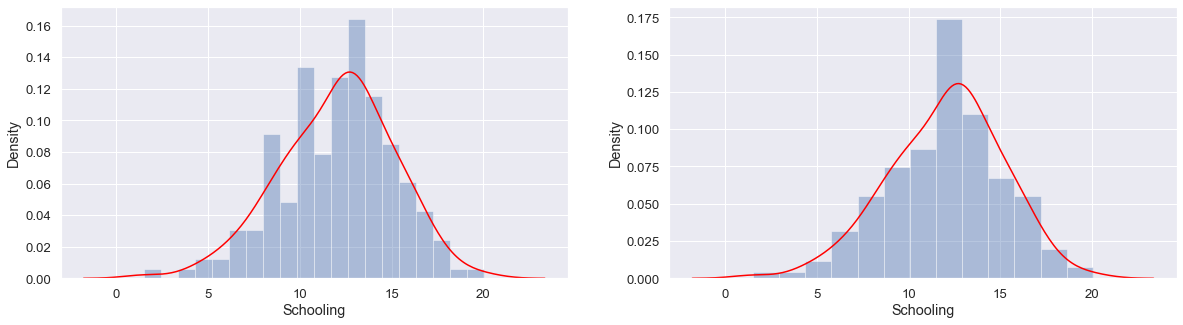

In [616]:
# seaborn version of KDF for Schooling

plt.rcParams["figure.figsize"] = (20,5) #makes the default size larger. 
#Everything after the comma is optional. 
fig, ax = plt.subplots(1,2)
sns.distplot(dfLE["Schooling"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
sns.distplot(dfLE["Schooling"], bins=20, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
plt.show()

In [617]:
# the distribution looks quite normal as its a near bell shape curve, 
# Therefore we will consider its as normal Distribution.

In [618]:
#s_cdf = thinkstats2.Cdf(dfLE["Schooling"])
#thinkplot.Cdf(s_cdf)
#sns.ecdfplot(data=dfLE["Schooling"])
#sns.set(style="darkgrid", font_scale=1.2)

<AxesSubplot:ylabel='Proportion'>

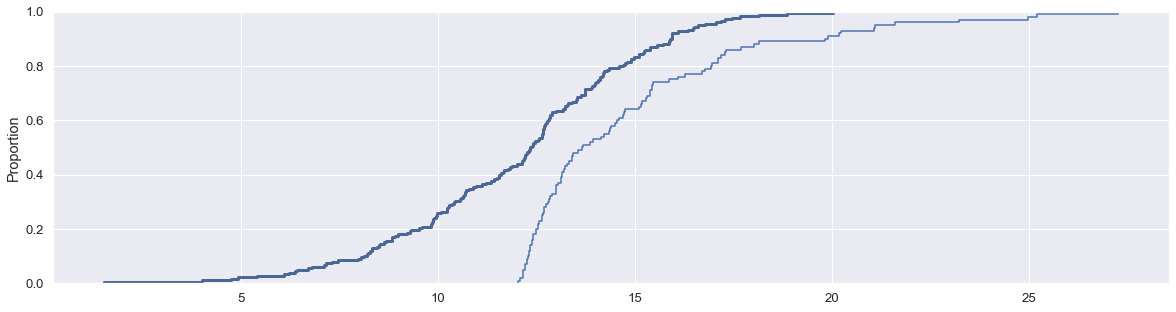

In [619]:
#Empirical and analytical plotted together

s_cdf = thinkstats2.Cdf(dfLE["Schooling"])
thinkplot.Cdf(s_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["Schooling"]), loc=np.mean(dfLE["Schooling"])))

#sep28-1:56Hrs,2.00Hrs

In [620]:
dfs.describe()

count    178.000000
mean      12.027739
std        3.104852
min        1.531250
25%        9.971875
50%       12.359375
75%       14.093750
max       20.037500
Name: Schooling, dtype: float64

In [621]:
def bigGraph(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

In [622]:
#bigGraph(dfs,"Schooling")

In [623]:
dfs.describe()

count    178.000000
mean      12.027739
std        3.104852
min        1.531250
25%        9.971875
50%       12.359375
75%       14.093750
max       20.037500
Name: Schooling, dtype: float64

In [624]:
#plt.title('schooling')
#sns.lineplot(data=dfs,x="GPD_per_Capita",y="Schooling")
#plt.yscale('log')
#plt.legend()

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [625]:
#GDP per capita column and removing NAN's from the GDP per Capita Data
df_p=dfLE["GDP_per_Capita"]
df_p=df_p[~np.isnan(df_p)]
df_p.head()

0    0.000034
1    0.003042
2    0.000132
3    0.000195
5    0.000348
Name: GDP_per_Capita, dtype: float64

In [626]:
# making objects for graph

hist2 = thinkstats2.Hist(df_p)
pmf2 = thinkstats2.Pmf(df_p)
cdf2 = thinkstats2.Cdf(df_p)

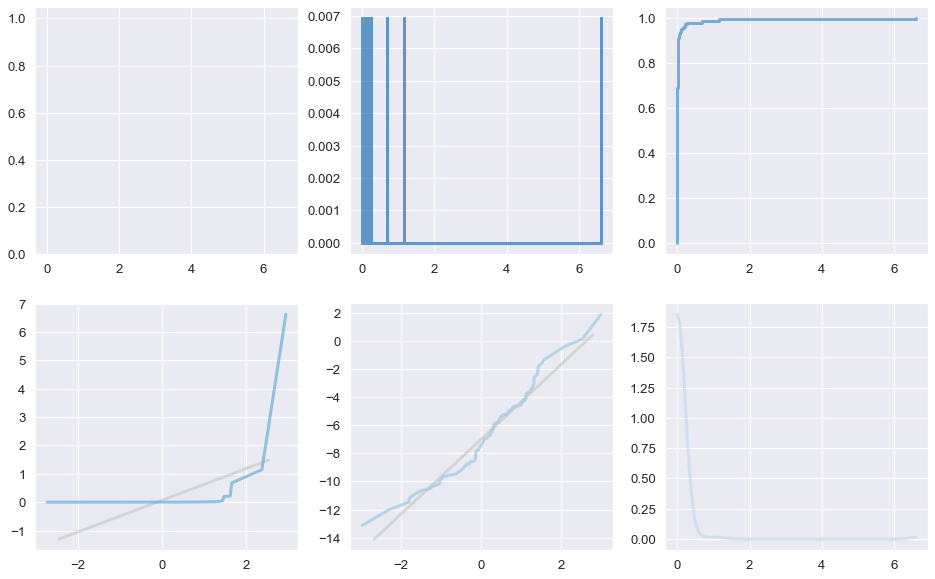

In [627]:
#Print all distributions
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df_p)
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df_p))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df_p) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

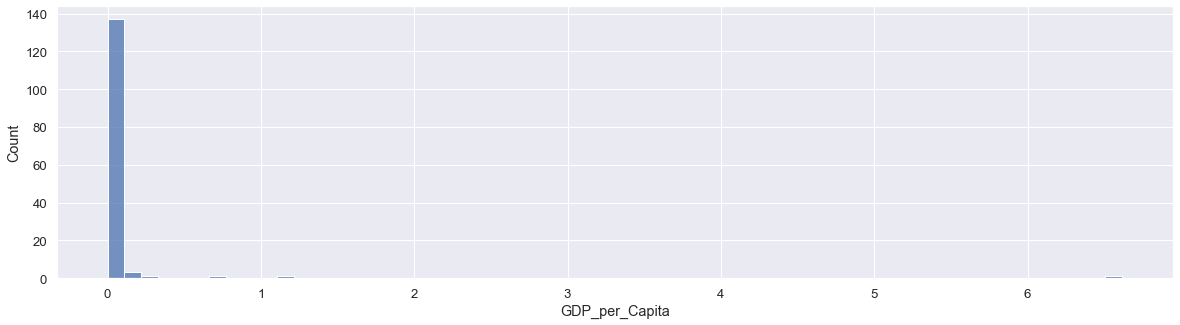

In [628]:
#Graph
sns.histplot(df_p, bins=60)



c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Density'>

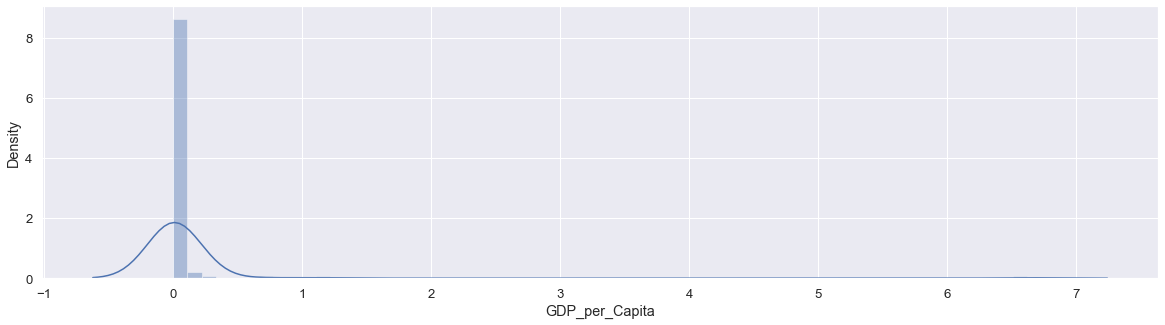

In [629]:
sns.distplot(df_p, bins=60)

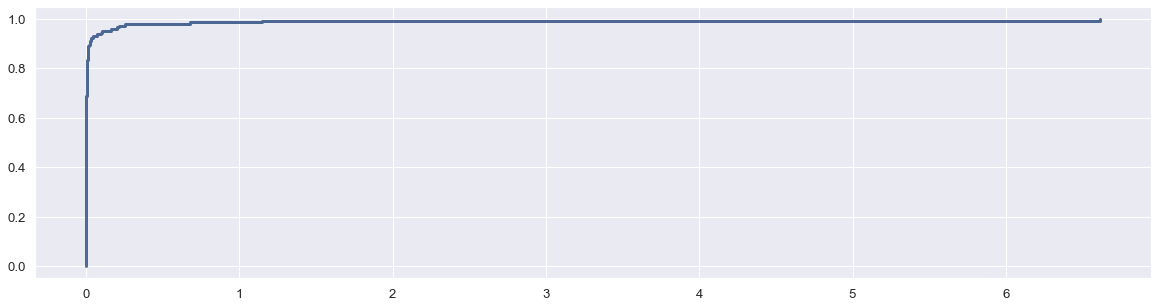

In [630]:
#Make an emperical CDF for "GDP PER CAPITA"
cdf_ap = thinkstats2.Cdf(df_p)
thinkplot.Cdf(cdf_ap)
sns.set(style="darkgrid", font_scale=1.2)

In [631]:
df_p.describe()

count    144.000000
mean       0.069740
std        0.561366
min        0.000002
25%        0.000113
50%        0.000744
75%        0.006091
max        6.616857
Name: GDP_per_Capita, dtype: float64

In [632]:
#Make analytical dist.
mu2 = df_p.mean()
sigma2 = df_p.std()
mu2, sigma2



(0.06974011278698682, 0.5613661326207577)

In [633]:
#Make an analytical distribution
dfs_pa = scipy.stats.norm(mu2,sigma2)

c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\shikh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


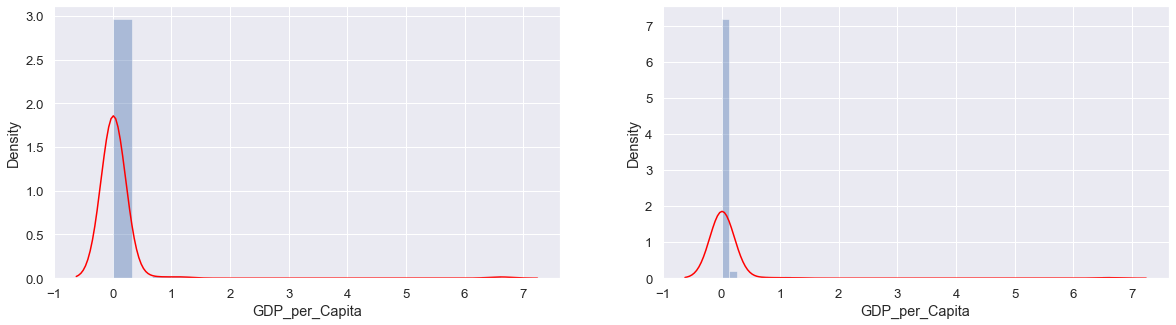

In [634]:
#anlytical distribuiton:
#KDF for "GDP per capita"
plt.rcParams["figure.figsize"] = (20,5) 
fig, ax = plt.subplots(1,2)
sns.distplot(dfLE["GDP_per_Capita"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
sns.distplot(dfLE["GDP_per_Capita"], bins=20, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
plt.show()

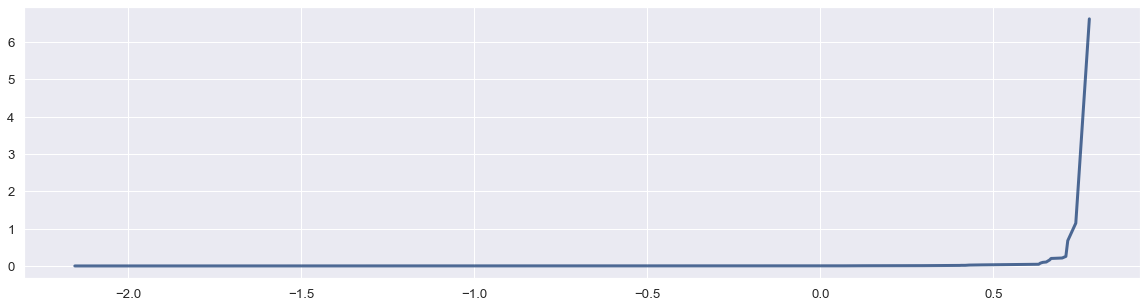

In [635]:
thinkstats2.NormalProbabilityPlot(dfLE["GDP_per_Capita"])
## jump in graph at the end shows exponential growth- generally exponential numbers are plotted against time.

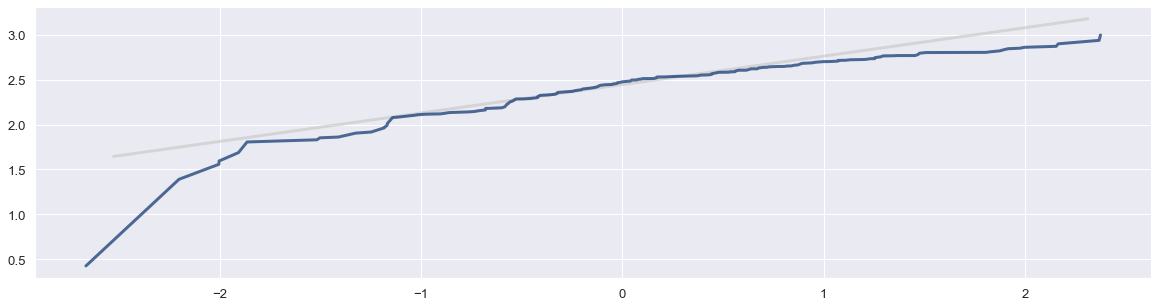

In [636]:
# analytical distribution
thinkstats2.NormalProbabilityPlot(np.log(dfs))

<AxesSubplot:ylabel='Proportion'>

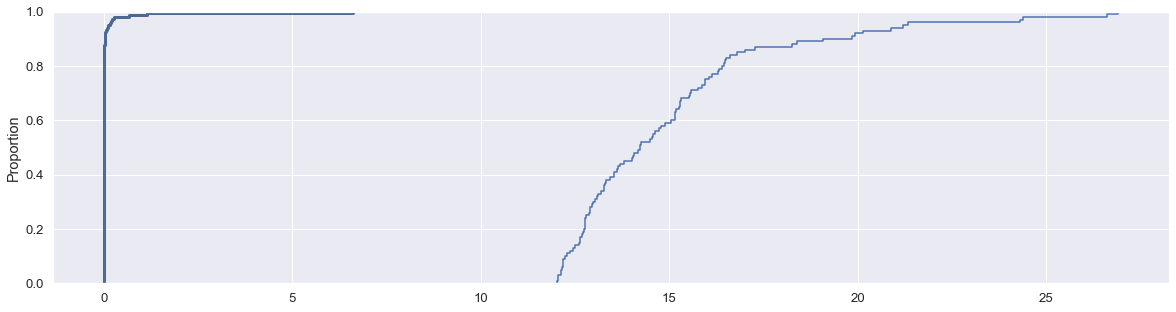

In [637]:
#Empirical and analytical plotted together for " GDP PER CAPITA"

gp_cdf = thinkstats2.Cdf(dfLE["GDP_per_Capita"])
thinkplot.Cdf(gp_cdf)
sns.ecdfplot(data=scipy.stats.expon.rvs(size=100, scale=np.std(dfLE["Schooling"]), loc=np.mean(dfLE["Schooling"])))

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [638]:
#dfLE

In [639]:
from cmath import nan


df_dev=dfLE[dfLE["isDeveloped"]==1.0]
df_ndev=dfLE[dfLE["isDeveloped"]==0.0]
#df_dev=df_dev[~np.isnan(df_dev)]
#dfLE=dfLE[~np.isnan(dfLE)]

In [640]:
#df_dev=df_dev[~np.isnan(df_dev)]

In [641]:
df_dev

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,0.007551
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,0.005224
15,Belgium,1.0,80.68125,70.1875,0.2500,11.042667,74.500000,81.5625,50.89375,1.0000,97.7500,97.3125,16915.306000,2.884043e+06,16.78750,0.005865
24,Bulgaria,1.0,72.85000,125.5000,0.9375,10.865333,94.500000,1530.3125,54.50000,1.0000,94.2500,94.0000,4938.981821,5.290924e+06,13.72500,0.000933
40,Croatia,1.0,76.11875,89.0000,0.0000,12.448000,96.222222,23.6875,52.35625,0.0000,95.5000,95.3750,9056.784719,1.159772e+06,13.88750,0.007809
42,Cyprus,1.0,79.67500,54.1250,0.0000,10.260667,92.625000,1.9375,53.16250,0.0000,98.0000,98.0000,13898.885501,3.902744e+05,13.51875,0.035613
43,Czechia,1.0,76.76875,71.8125,0.0000,13.026000,97.285714,22.9375,55.71250,0.0000,98.0000,98.1250,NaN,NaN,NaN,NaN
47,Denmark,1.0,79.25625,66.0625,0.0000,10.708000,NaN,15.7500,55.82500,0.0000,88.0000,88.0000,33067.407916,4.260081e+06,17.19375,0.007762
64,Germany,1.0,81.17500,71.2500,2.5000,11.628667,77.437500,1497.1875,51.99375,3.2500,94.8125,89.8750,24337.749100,3.875735e+07,16.60000,0.000628
74,Hungary,1.0,73.82500,147.0625,0.5625,11.427333,NaN,2.0625,56.93125,0.8750,98.9375,99.0000,8513.641831,1.604902e+06,15.11875,0.005305


In [642]:
#df_dev=df_dev[~nan[df_dev]]

In [643]:
#oulier
df_dev=df_dev[df_dev["infantdeaths"]>0.10]
df_ndev=df_ndev[df_ndev["infantdeaths"]>0.10]


In [644]:
df_dev=df_dev[["Country","AdultMortality","GDP","infantdeaths","Schooling","Lifeexpectancy","under-fivedeaths","Population","GDP_per_Capita"]]
df_ndev=df_ndev[["Country","AdultMortality","GDP","infantdeaths","Schooling","Lifeexpectancy","under-fivedeaths","Population","GDP_per_Capita"]]

In [645]:
df_dev=df_dev[df_dev["infantdeaths"]>0.10]
df_ndev=df_ndev[df_ndev["infantdeaths"]>0.10]

In [646]:
#Cut down data to only numeric values, and fliter out some outliers. 
#df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
#df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

In [647]:
df_dev

,Country,AdultMortality,GDP,infantdeaths,Schooling,Lifeexpectancy,under-fivedeaths,Population,GDP_per_Capita
7,Australia,63.1875,34637.565047,1.0000,20.03750,81.81250,1.3750,4.587010e+06,0.007551
15,Belgium,70.1875,16915.306000,0.2500,16.78750,80.68125,1.0000,2.884043e+06,0.005865
24,Bulgaria,125.5000,4938.981821,0.9375,13.72500,72.85000,1.0000,5.290924e+06,0.000933
64,Germany,71.2500,24337.749100,2.5000,16.60000,81.17500,3.2500,3.875735e+07,0.000628
74,Hungary,147.0625,8513.641831,0.5625,15.11875,73.82500,0.8750,1.604902e+06,0.005305
82,Italy,54.1875,21234.782371,2.0000,15.93125,82.18750,2.3125,2.764379e+07,0.000768
84,Japan,57.1250,24892.544784,2.8750,14.97500,82.53750,4.0000,9.738406e+04,0.255612
118,Netherlands,61.6250,34964.719797,1.0000,17.05625,81.13125,1.0000,9.775704e+06,0.003577
133,Poland,107.5625,6792.563600,2.2500,15.25000,75.65000,2.6875,1.605325e+07,0.000423
134,Portugal,58.8750,11598.625531,0.1875,15.93750,79.99375,0.3750,1.032225e+06,0.011237


In [648]:
df_ndev

,Country,AdultMortality,GDP,infantdeaths,Schooling,Lifeexpectancy,under-fivedeaths,Population,GDP_per_Capita
0,Afghanistan,269.0625,340.015425,78.2500,8.21250,58.19375,107.5625,9.972260e+06,0.000034
1,Albania,45.0625,2119.726679,0.6875,12.13750,75.15625,0.9375,6.969116e+05,0.003042
2,Algeria,108.1875,2847.853392,20.3125,12.71250,73.61875,23.5000,2.164983e+07,0.000132
3,Angola,328.5625,1975.143045,83.7500,8.04375,49.01875,132.6250,1.014710e+07,0.000195
5,Argentina,106.0000,6998.575103,10.1250,16.50625,75.15625,11.3750,2.012120e+07,0.000348
...,...,...,...,...,...,...,...,...,...
186,Venezuela(BolivarianRepublicof),163.0000,NaN,9.3750,12.78750,73.38750,10.7500,NaN,NaN
187,VietNam,126.5625,NaN,29.1875,11.51250,74.77500,36.5000,NaN,NaN
188,Yemen,211.8125,NaN,39.3750,8.50625,63.86250,51.6250,NaN,NaN
189,Zambia,354.3125,811.811841,33.4375,11.21250,53.90625,52.3750,6.260246e+06,0.000130


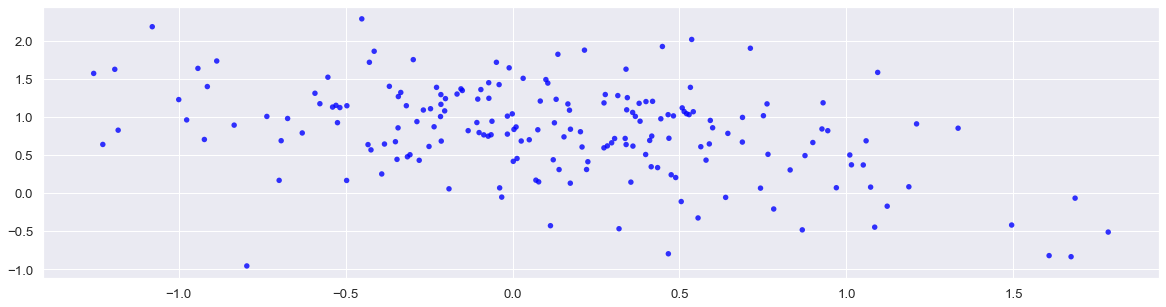

In [649]:
thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==1),thinkstats2.Jitter(dfLE["isDeveloped"]==0),alpha=.8)
#thinkplot.Scatter(thinkstats2.Jitter(dfLE["isDeveloped"]==0.0))

In [650]:
#thinkplot.Scatter(thinkstats2.Jitter(df_dev),thinkstats2.Jitter(df_ndev),alpha=.3)

In [651]:
#Everytime X increases, Y decreases by a proportionate amount.  negatively correlated. 
#EVERYTIME X INCREASES, Y DECREASES BY A PROPORTIONATE AMOUNT. THEREFORE THE DEVELOPED COUNTIRES 
# AND NOT DEVELOPED COUNTRIES ARE NEGATIVELY CORRELATED.

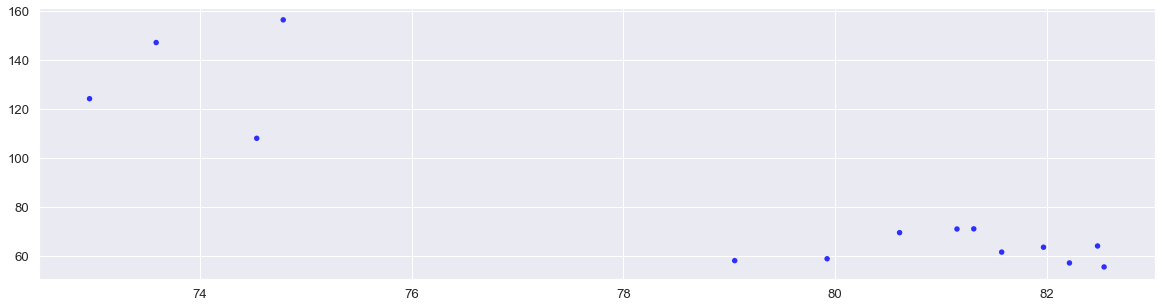

In [652]:
#CORRELATION BETWEEN LIFEEXPECTANCY AND ADULMORTALITY ARE LOW CORELATED IN DEVELEOPED COUNTIRES

thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["AdultMortality"]),alpha=.8)

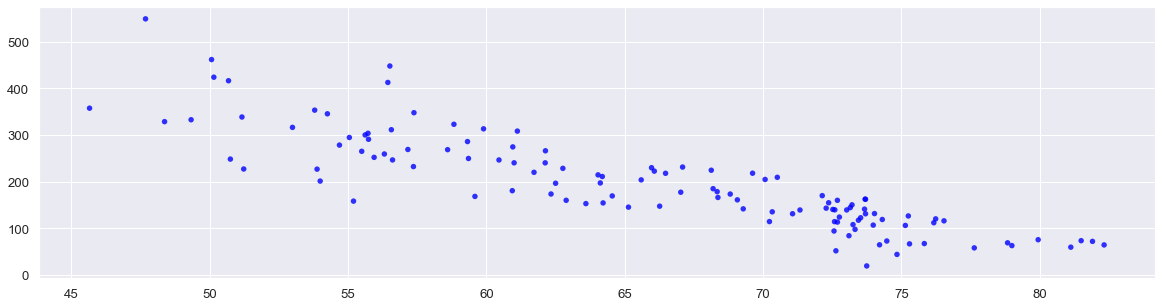

In [653]:
#CORRELATION BETWEEN LIFEEXPECTANCY AND ADULMORTALITY HAVE  HIGH NEGATIVE CORELATED IN NOT DEVELEOPED COUNTIRES

thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["AdultMortality"]),alpha=.8)


In [654]:
# GDP_per_capita is directly related to high infant deaths as it is clearly visible from the above 
# filetering the data for infant death 1 or more than 1 for developed countries where per capita income is more than 200 
# units the survival rate is high and infant death 1 or more for not developed countries where  the per capita income is 
# less than  200 units survival rate is. now

In [655]:
#thinkplot.Scatter(thinkstats2.Jitter(df_ndev["GDP"]),thinkstats2.Jitter(df_ndev["Polio"]),alpha=.8)

In [656]:
#thinkplot.Scatter(thinkstats2.Jitter(df_dev["GDP"]),thinkstats2.Jitter(df_dev["Polio"]),alpha=.8)

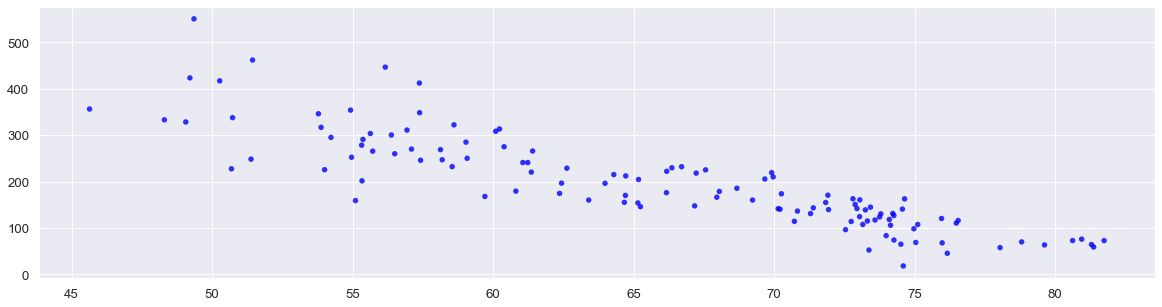

In [657]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["AdultMortality"]),alpha=.8)

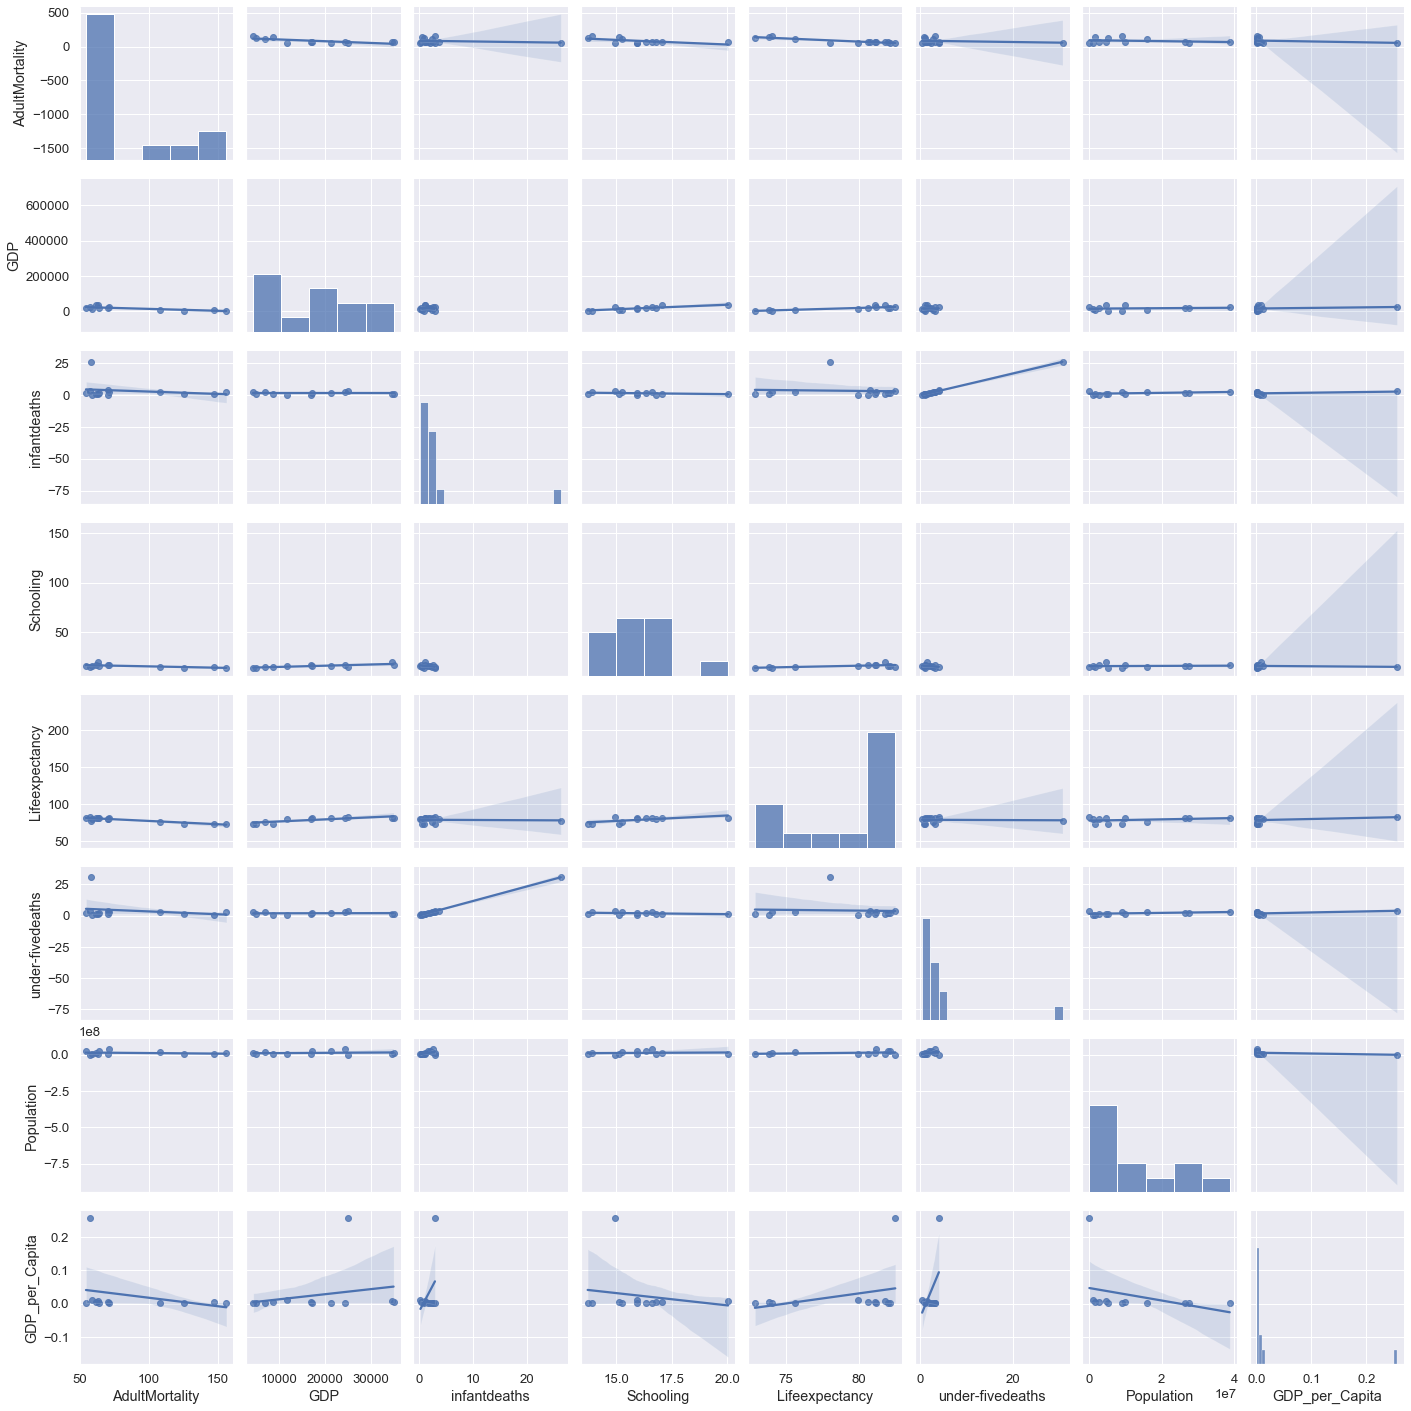

In [658]:
sns.pairplot(data=df_dev, kind="reg")
plt.show()

In [659]:
#Visualize correlations. 
#a=df_dev.values.tolist()
#b=df_ndev.values.tolist()
#thinkstats2.Corr(a,b), thinkstats2.SpearmanCorr(a,b)


In [660]:
#plt.rcParams["figure.figsize"] = (20,10)
#thinkplot.Scatter(df_dev, df_ndev)
#thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])



### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [661]:
#Calculate correlations and analyze. 



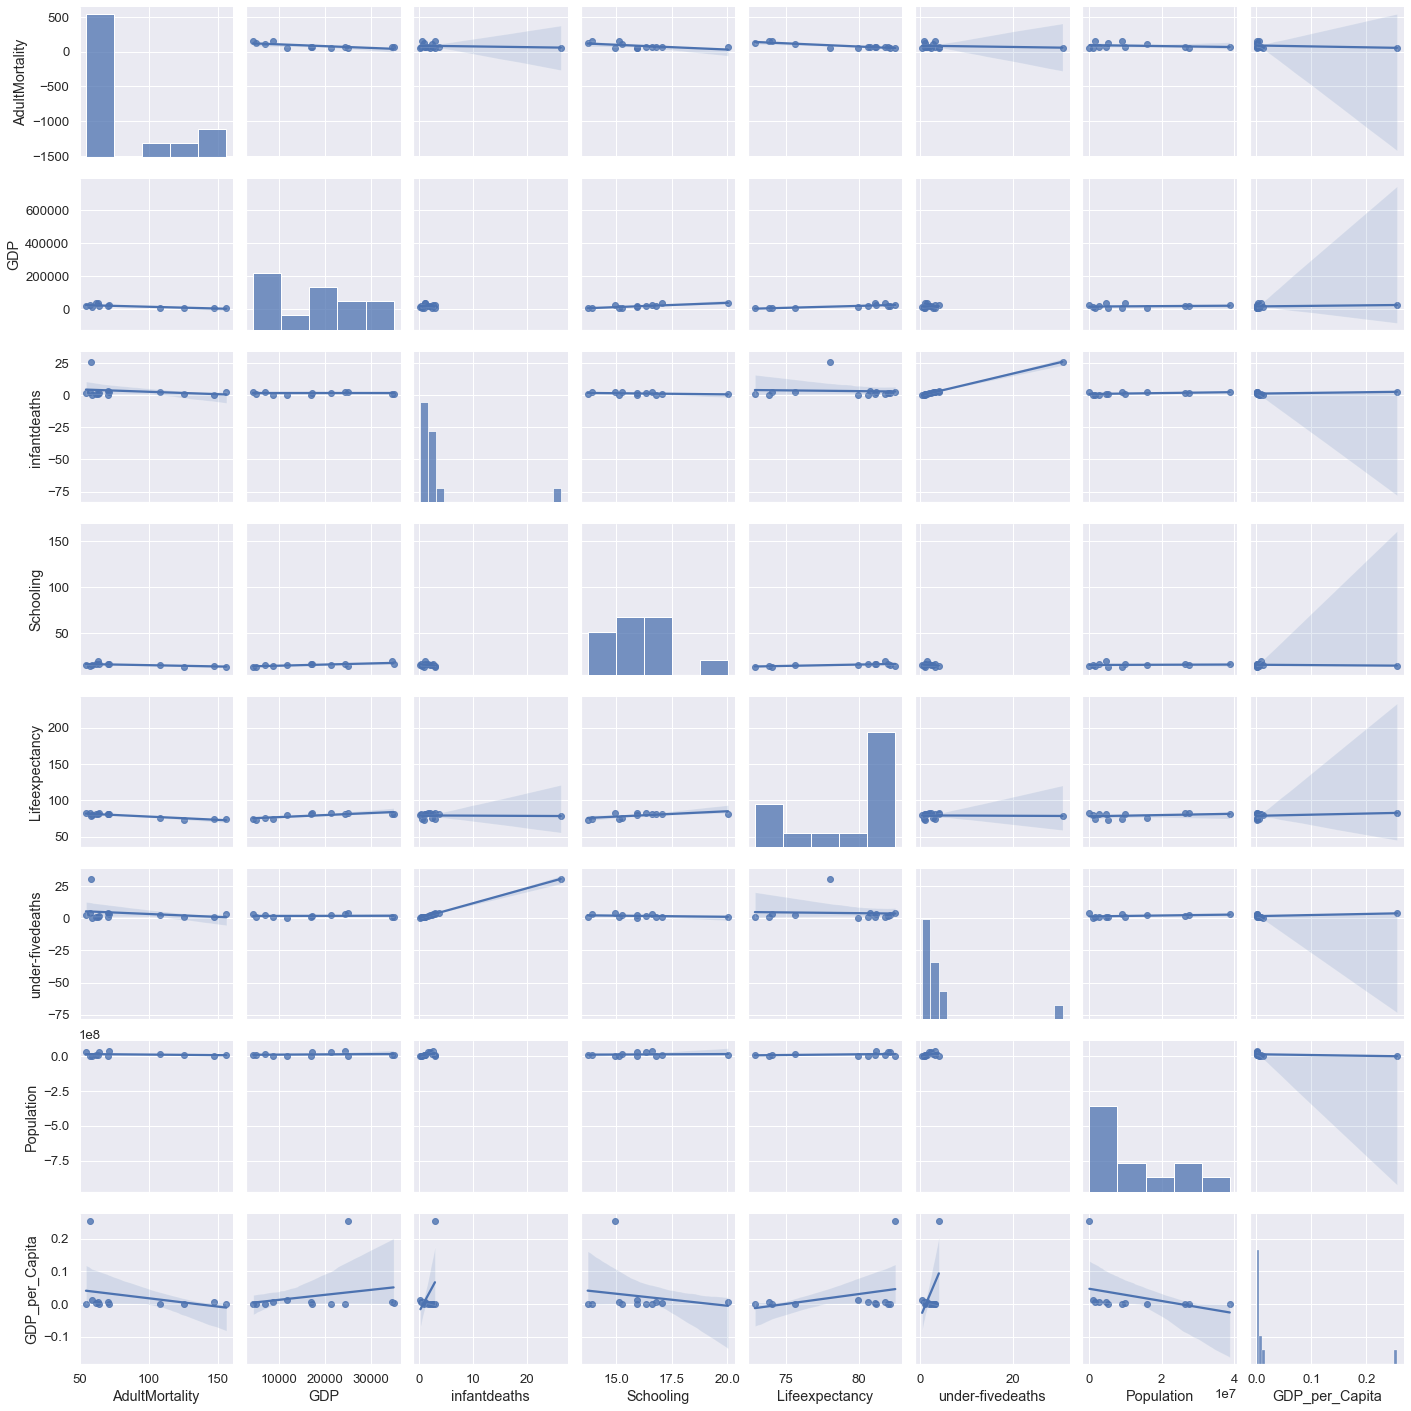

In [662]:
sns.pairplot(data=df_dev, kind="reg")
plt.show()

In [663]:
#Take the data in our dataframe, and change it into a set of correlations. 
#df_dev = dfLE.apply(pd.to_numeric, errors='coerce')
#drg2 = drg2.drop(columns=["age"])
#drg2 = drg2.corr()
#drg2.head()

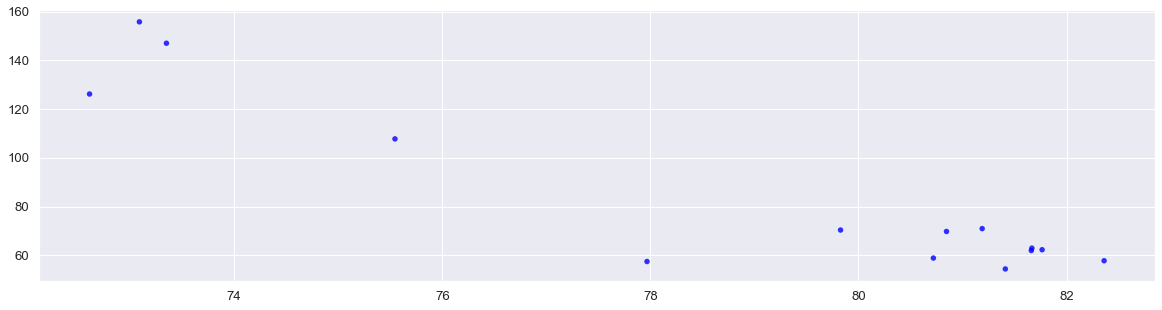

In [664]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["AdultMortality"]),alpha=.8)

In [665]:
#Calculate some correleations
#print("Lifeexpectancy-Adult:", thinkstats2.Corr(df_dev["Lifeexpectancy"], df_dev["GDP"]), thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["GDP"] ))
#print("Glucose-Insulin:", thinkstats2.Corr(d["Glucose"], d["Insulin"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Insulin"]))
#print("Glucose-BP:", thinkstats2.Corr(d["Glucose"], d["BloodPressure"]), thinkstats2.SpearmanCorr(d["Glucose"], d["BloodPressure"]))

Lifeexpectancy-Adult: nan nan


In [691]:
# CALCULATION FOR CORRELATION FOR DEVELOPED COUNTRIES:
thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"])
thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["GDP"])
thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["Schooling"])
print("Correlation for Lifeexpectancy-AdultMortality: ",thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))
print("Correlation for Lifeexpectancy-GDP: ",thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["GDP"]))
print("Correlation for Lifeexpectancy-Schooling: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

Correlation for Lifeexpectancy-AdultMortality:  -0.9078641735859712
Correlation for Lifeexpectancy-GDP:  nan
Correlation for Lifeexpectancy-Schooling:  nan


In [688]:
thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"])
thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["GDP"])
thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"])

print("Correlation for Lifeexpectancy-AdultMortality: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))
print("Correlation for Lifeexpectancy-GDP: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["GDP"]))
print("Correlation for Lifeexpectancy-Schooling: ",thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

Correlation for Lifeexpectancy-AdultMortality:  -0.7054945054945054
Correlation for Lifeexpectancy-GDP:  nan
Correlation for Lifeexpectancy-Schooling:  nan


nan


In [680]:
print(thinkstats2.SpearmanCorr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

nan


In [669]:
# CALCULATION FOR CORRELATION-

In [667]:
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))

-0.9078641735859712


In [670]:
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["Schooling"]))

nan


In [689]:
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["GDP"]))

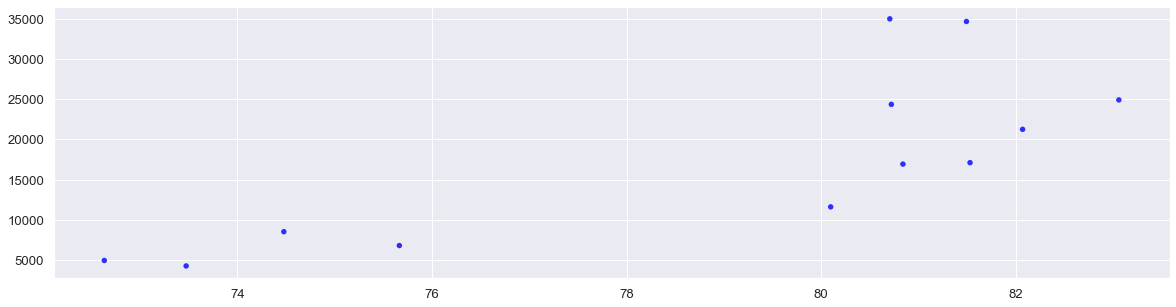

In [690]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["GDP"]),alpha=.8)
#print(thinkstats2.Corr(df_dev["Lifeexpectancy"],df_dev["AdultMortality"]))

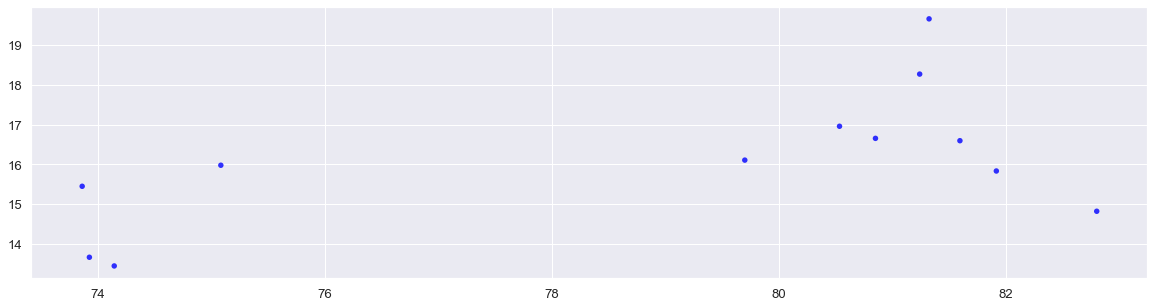

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["Schooling"]),alpha=.8)

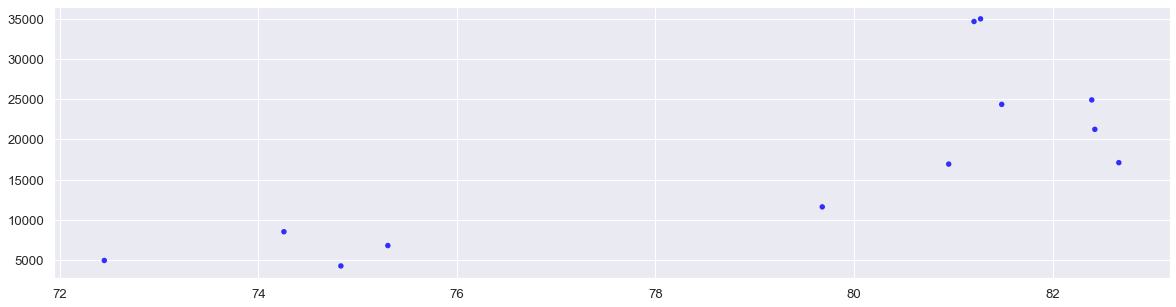

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(df_dev["Lifeexpectancy"]),thinkstats2.Jitter(df_dev["GDP"]),alpha=.8)

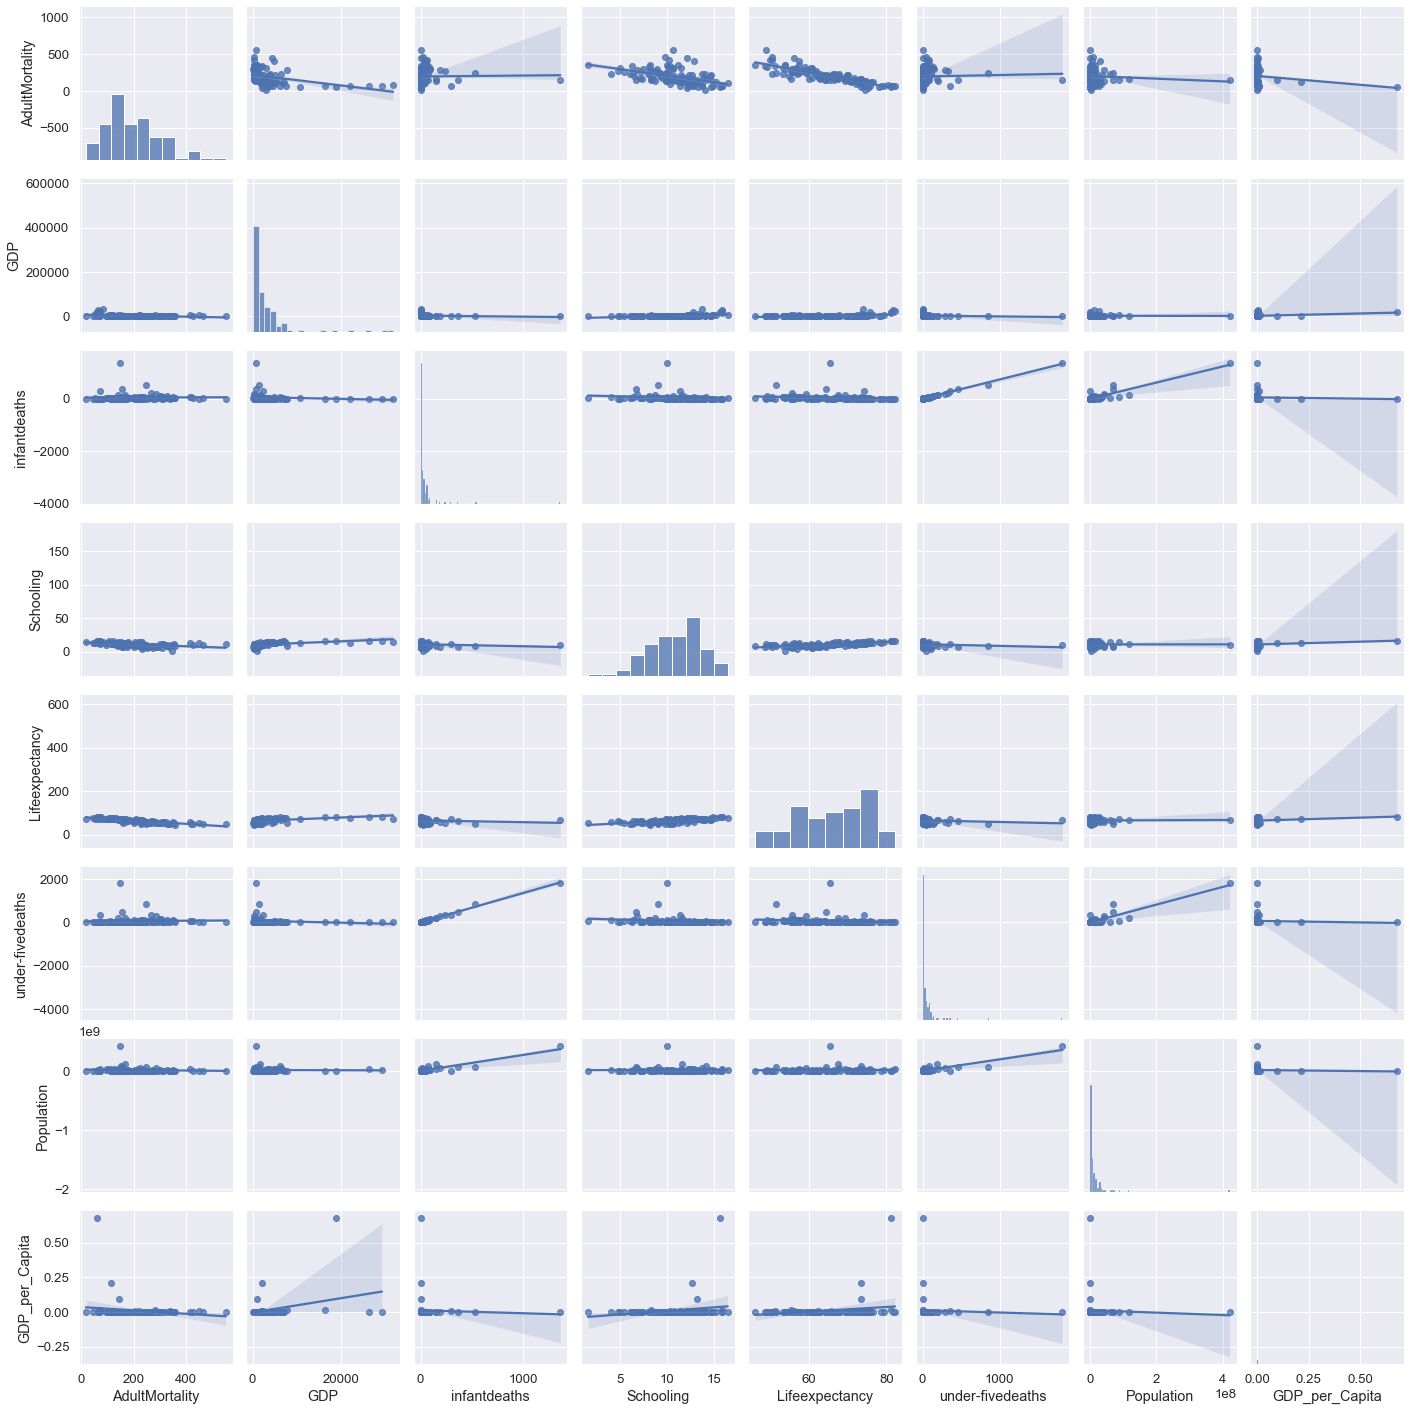

In [ ]:
sns.pairplot(data=df_ndev, kind="reg")
plt.show()

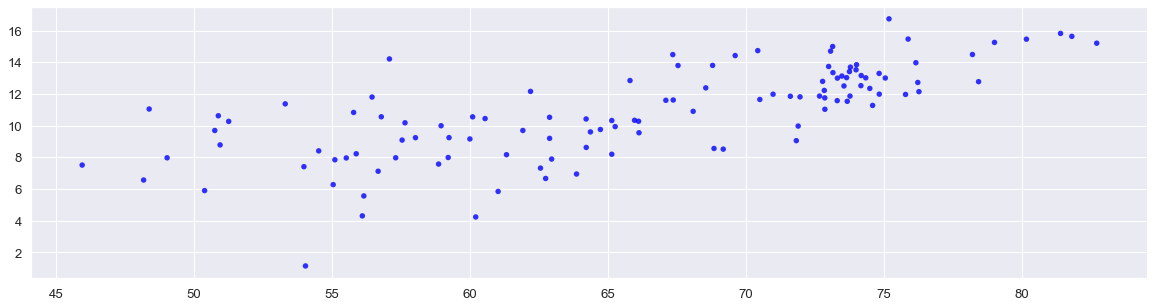

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["Schooling"]),alpha=.8)

In [671]:
print(thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["Schooling"]))

nan


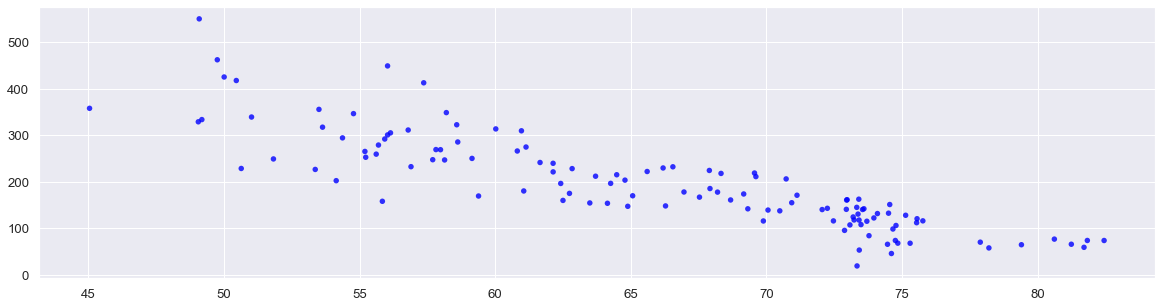

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["AdultMortality"]),alpha=.8)

In [672]:

print(thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["AdultMortality"]))

-0.8718040084363814


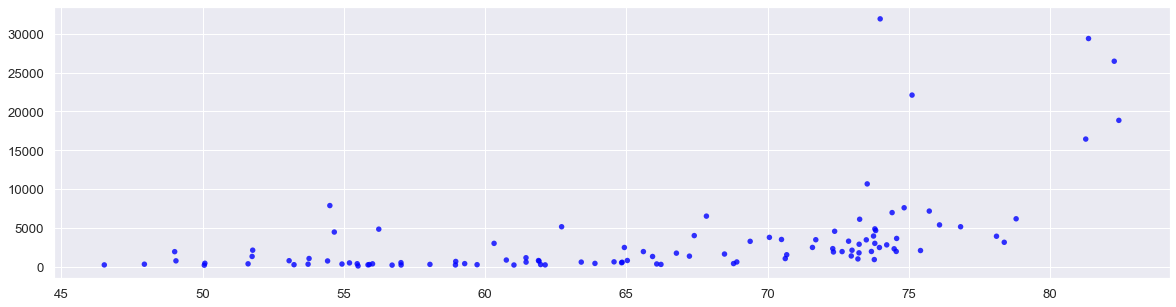

In [ ]:
thinkplot.Scatter(thinkstats2.Jitter(df_ndev["Lifeexpectancy"]),thinkstats2.Jitter(df_ndev["GDP"]),alpha=.8)

In [673]:
print(thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["GDP"]))

nan


In [692]:
# CALCULATION FOR CORRELATION FOR DEVELOPED COUNTRIES:
thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["AdultMortality"])
thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["GDP"])
thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["Schooling"])
print("Correlation for Lifeexpectancy-AdultMortality: ",thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["AdultMortality"]))
print("Correlation for Lifeexpectancy-GDP: ",thinkstats2.Corr(df_ndev["Lifeexpectancy"],df_ndev["GDP"]))
print("Correlation for Lifeexpectancy-Schooling: ",thinkstats2.SpearmanCorr(df_ndev["Lifeexpectancy"],df_ndev["Schooling"]))

Correlation for Lifeexpectancy-AdultMortality:  -0.8718040084363814
Correlation for Lifeexpectancy-GDP:  nan
Correlation for Lifeexpectancy-Schooling:  nan
